<a href="https://colab.research.google.com/github/nayan1306/catordog/blob/main/Dog_vs_Cat_image_classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extracting dataset using kaggle API

In [7]:
# Installing kaggle library
!pip install kaggle

In [8]:
# Configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


##Importing Cat vs Dog dataset from kaggle

In [9]:
#Kaggle API
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:03<00:00, 143MB/s]
100% 812M/812M [00:03<00:00, 229MB/s]


In [10]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [11]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Dataset is Extracted")

Dataset is Extracted


In [12]:
# Extracting the train.zip
train_path = '/content/train.zip'

with ZipFile(train_path,'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [13]:
#Counting number of files in the train folder
import os

path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images :',file_count)


Number of images : 25000


Printing the names of images

In [14]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.8464.jpg', 'cat.5618.jpg', 'cat.696.jpg', 'dog.9728.jpg', 'dog.1805.jpg', 'cat.1457.jpg', 'dog.3543.jpg', 'cat.5900.jpg', 'cat.8766.jpg', 'cat.12380.jpg', 'dog.5957.jpg', 'cat.3261.jpg', 'cat.3255.jpg', 'dog.303.jpg', 'dog.5186.jpg', 'cat.11818.jpg', 'dog.10787.jpg', 'dog.636.jpg', 'dog.179.jpg', 'dog.9512.jpg', 'cat.7567.jpg', 'cat.1905.jpg', 'cat.8672.jpg', 'dog.3177.jpg', 'cat.337.jpg', 'cat.9484.jpg', 'cat.12203.jpg', 'dog.5661.jpg', 'dog.3940.jpg', 'cat.3997.jpg', 'dog.555.jpg', 'dog.11554.jpg', 'dog.1535.jpg', 'cat.4898.jpg', 'dog.3653.jpg', 'dog.5444.jpg', 'cat.8630.jpg', 'cat.10678.jpg', 'cat.9709.jpg', 'cat.10744.jpg', 'dog.8768.jpg', 'cat.1231.jpg', 'cat.7813.jpg', 'cat.9759.jpg', 'dog.1057.jpg', 'cat.9008.jpg', 'cat.1160.jpg', 'cat.8399.jpg', 'cat.10484.jpg', 'cat.7729.jpg', 'dog.10503.jpg', 'dog.1337.jpg', 'cat.206.jpg', 'dog.1073.jpg', 'cat.537.jpg', 'dog.9122.jpg', 'dog.12359.jpg', 'dog.9837.jpg', 'cat.11385.jpg', 'dog.1624.jpg', 'dog.710.jpg', 'dog.10840.jpg', 'dog

# Importing the dependencies

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import  cv2_imshow
%matplotlib inline

Displaying the images of dogs and cats

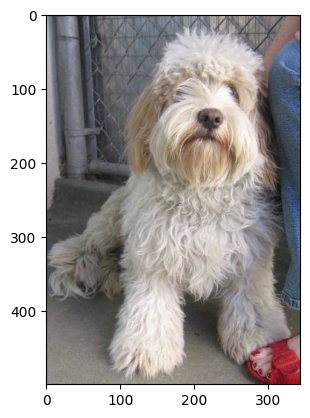

In [16]:
img_dog = mpimg.imread('/content/train/dog.1805.jpg')
plt.imshow(img_dog)

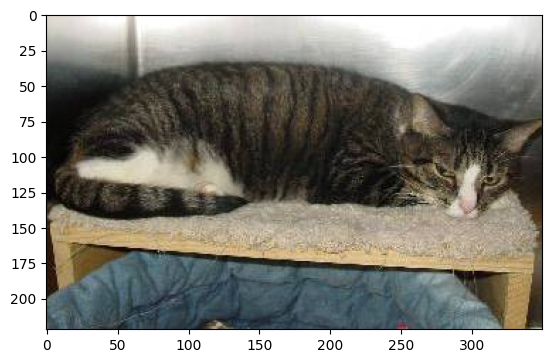

In [17]:
img_cat = mpimg.imread('/content/train/cat.696.jpg')
plt.imshow(img_cat)

Counting total number of cat and dog images

In [18]:
image_names = os.listdir('/content/train/')
print('Total number of Cat Images : ',sum(1 for name in image_names if 'cat' in name))
print('Total number of Dog Images : ',sum(1 for name in image_names if 'dog' in name))

Total number of Cat Images :  12500
Total number of Dog Images :  12500


>As it can be observed the images are of different sizes.

Resizing the images

In [19]:
# create a directory for resized image
os.mkdir('/content/image_resized')

In [21]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

# resizing only 2000 images

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

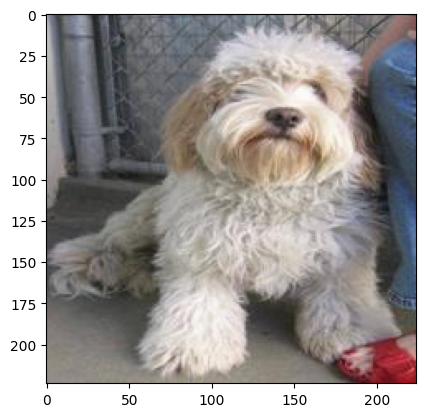

In [25]:
# display resized dog image
img = mpimg.imread('/content/image_resized/dog.1805.jpg')
plt.imshow(img)


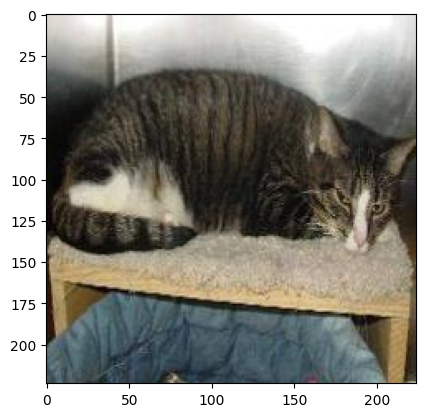

In [26]:
img = mpimg.imread('/content/image_resized/cat.696.jpg')
plt.imshow(img)

Creating labels for resized images of dogs and cats

> Cat --> 0

> Dog --> 1

In [27]:
filenames = os.listdir('/content/image_resized/')
labels = [1 if filenames[i][0:3]=='dog' else 0 for i in range(2000)]



In [28]:
print(filenames[0:5])
print(len(filenames))

['cat.8464.jpg', 'cat.5618.jpg', 'cat.696.jpg', 'dog.9728.jpg', 'dog.1805.jpg']
2000


In [31]:
print(labels[0:5],'\n',len(labels))

[0, 0, 0, 1, 1] 
 2000


## Converting all the resized images into numpy arrays

In [32]:
import cv2
import glob

In [33]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [34]:
dog_cat_images

array([[[[ 16,  24,  14],
         [  9,  17,  10],
         [  4,  15,  12],
         ...,
         [ 69,   0,   3],
         [ 67,   1,   2],
         [ 67,   1,   2]],

        [[ 17,  25,  15],
         [ 10,  18,  11],
         [  3,  14,  11],
         ...,
         [ 69,   1,   2],
         [ 67,   1,   2],
         [ 67,   1,   2]],

        [[ 12,  22,  10],
         [  5,  16,   6],
         [  1,  13,   7],
         ...,
         [ 69,   2,   1],
         [ 69,   2,   1],
         [ 69,   2,   1]],

        ...,

        [[251, 247, 252],
         [252, 248, 253],
         [249, 245, 250],
         ...,
         [223, 230, 233],
         [231, 238, 241],
         [239, 246, 249]],

        [[249, 245, 250],
         [240, 236, 241],
         [232, 228, 233],
         ...,
         [223, 230, 233],
         [225, 232, 235],
         [229, 236, 239]],

        [[255, 252, 255],
         [239, 235, 240],
         [226, 222, 227],
         ...,
         [236, 243, 246],
        

In [35]:
type(dog_cat_images)

numpy.ndarray

In [36]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [37]:
X = dog_cat_images
Y = np.asarray(labels)

## Train Test Split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [41]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [42]:
print(X_train_scaled)

[[[[0.36078431 0.35294118 0.35294118]
   [0.21568627 0.17647059 0.17647059]
   [0.5372549  0.44705882 0.43921569]
   ...
   [0.65490196 0.63529412 0.63921569]
   [0.5372549  0.54509804 0.54901961]
   [0.35294118 0.36862745 0.37254902]]

  [[0.36470588 0.35686275 0.35686275]
   [0.21960784 0.18039216 0.18039216]
   [0.5372549  0.44705882 0.43921569]
   ...
   [0.65098039 0.63137255 0.63529412]
   [0.53333333 0.54117647 0.54509804]
   [0.34509804 0.36078431 0.36470588]]

  [[0.36470588 0.35686275 0.35686275]
   [0.21960784 0.18039216 0.18039216]
   [0.5372549  0.44705882 0.43921569]
   ...
   [0.65098039 0.63137255 0.63529412]
   [0.52156863 0.52941176 0.53333333]
   [0.3254902  0.34117647 0.34509804]]

  ...

  [[0.40784314 0.37647059 0.49803922]
   [0.50980392 0.47843137 0.6       ]
   [0.52941176 0.48627451 0.61176471]
   ...
   [0.75686275 0.76470588 0.76862745]
   [0.79607843 0.80392157 0.80784314]
   [0.81176471 0.81960784 0.82352941]]

  [[0.33333333 0.30196078 0.42352941]
   [0.3

# Making the neural network

In [44]:
import tensorflow as tf
import tensorflow_hub as hub

In [45]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [46]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [47]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [48]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 42s 749ms/step - loss: 0.2817 - acc: 0.8706
Epoch 2/5
50/50 [==============================] - 32s 643ms/step - loss: 0.0756 - acc: 0.9737
Epoch 3/5
50/50 [==============================] - 34s 692ms/step - loss: 0.0570 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 33s 659ms/step - loss: 0.0469 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 32s 650ms/step - loss: 0.0387 - acc: 0.9894


In [49]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 8s 569ms/step - loss: 0.0676 - acc: 0.9750
Test Loss = 0.06761755049228668
Test Accuracy = 0.9750000238418579


#Predictive System



In [50]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 9.4 MB/s eta 0:

In [63]:
import gradio as gr
import cv2
import numpy as np

# Load your pre-trained model
model = model

def predict_image(input_image):
    # Resize and preprocess the input image
    input_image_resize = cv2.resize(input_image, (224, 224))
    input_image_scaled = input_image_resize / 255
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

    # Make predictions using the loaded model
    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    # Determine the label based on the prediction
    if input_pred_label == 0:
        result = 'Cat'
    else:
        result = 'Dog'

    return result

# Define Gradio interface
iface = gr.Interface(
    fn=predict_image,
    inputs=gr.inputs.Image(type="numpy"),
    outputs=gr.outputs.Label(),
    live=True
)

iface.launch(share=True)

<ipython-input-63-4db4a5fb9446>:29: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Image(type="numpy"),
<ipython-input-63-4db4a5fb9446>:29: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Image(type="numpy"),
<ipython-input-63-4db4a5fb9446>:30: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs=gr.outputs.Label(),
<ipython-input-63-4db4a5fb9446>:30: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  outputs=gr.outputs.Label(),


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4b68a7947ea87db87b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
